
Processando coluna: cap-shape
Acurácia IterativeImputer+DT: 44.50%
Acurácia Moda Global:         44.00%

Processando coluna: cap-surface
Acurácia IterativeImputer+DT: 47.50%
Acurácia Moda Global:         40.00%

Processando coluna: bruises
Acurácia IterativeImputer+DT: 100.00%
Acurácia Moda Global:         53.00%

Processando coluna: odor
Acurácia IterativeImputer+DT: 87.50%
Acurácia Moda Global:         46.50%

Processando coluna: gill-color
Acurácia IterativeImputer+DT: 20.00%
Acurácia Moda Global:         26.50%


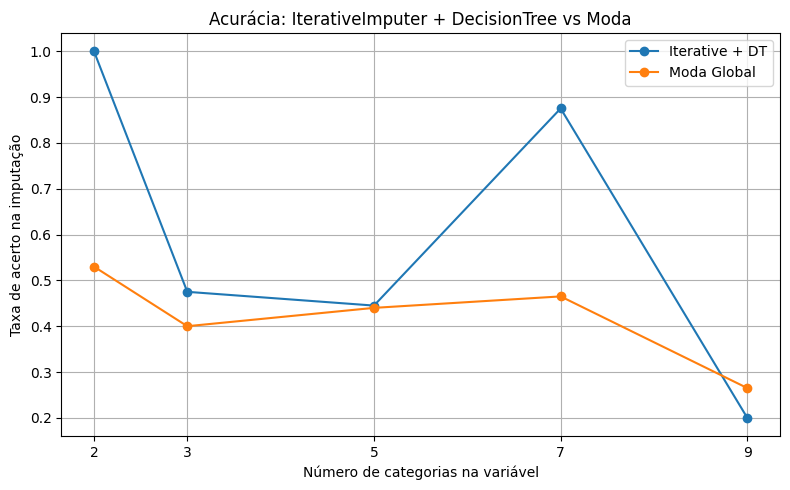

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm

# 1. Carregar dados
file_path = 'mushrooms_data/agaricus-lepiota.data'
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv(file_path, header=None, names=columns)
df.replace('?', np.nan, inplace=True)
df_full = df.dropna().sample(n=1000, random_state=42).reset_index(drop=True)

test_cols = ['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-color']
missing_rate = 0.2
np.random.seed(42)

num_categories = []
accuracy_iterative = []
accuracy_mode = []

for col in test_cols:
    print(f"\nProcessando coluna: {col}")

    df_missing = df_full.copy()
    n_missing = int(len(df_missing) * missing_rate)
    missing_indices = np.random.choice(df_missing.index, size=n_missing, replace=False)
    df_missing.loc[missing_indices, col] = np.nan

    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df_encoded = encoder.fit_transform(df_missing)

    imputer = IterativeImputer(
        estimator=DecisionTreeClassifier(random_state=42),
        max_iter=10,
        random_state=42
    )
    df_imputed_array = imputer.fit_transform(df_encoded)

    df_imputed = pd.DataFrame(df_imputed_array, columns=columns).round().astype(int)
    df_imputed = pd.DataFrame(encoder.inverse_transform(df_imputed), columns=columns)

    true_values = df_full.loc[missing_indices, col].reset_index(drop=True)
    pred_values = df_imputed.loc[missing_indices, col].reset_index(drop=True)
    acc_iterative = (true_values == pred_values).mean()

    global_mode = df_full[col].mode().iloc[0]
    df_imputed_mode = df_missing.copy()
    df_imputed_mode.loc[missing_indices, col] = global_mode
    acc_mode = (
        true_values.reset_index(drop=True) ==
        df_imputed_mode.loc[missing_indices, col].reset_index(drop=True)
    ).mean()

    num_categories.append(df_full[col].nunique())
    accuracy_iterative.append(acc_iterative)
    accuracy_mode.append(acc_mode)

    print(f"Acurácia IterativeImputer+DT: {acc_iterative:.2%}")
    print(f"Acurácia Moda Global:         {acc_mode:.2%}")

# Plotar
results = pd.DataFrame({
    'num_categories': num_categories,
    'accuracy_iterative': accuracy_iterative,
    'accuracy_mode': accuracy_mode
}).sort_values(by='num_categories')

plt.figure(figsize=(8, 5))
plt.plot(results['num_categories'], results['accuracy_iterative'], marker='o', label='Iterative + DT')
plt.plot(results['num_categories'], results['accuracy_mode'], marker='o', label='Moda Global')
plt.xticks(results['num_categories'])
plt.xlabel('Número de categorias na variável')
plt.ylabel('Taxa de acerto na imputação')
plt.title('Acurácia: IterativeImputer + DecisionTree vs Moda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Processando coluna: cap-shape
Acurácia IterativeImputer + DecisionTree: 50.50%
Acurácia Moda Global:                     44.00%

Processando coluna: cap-surface
Acurácia IterativeImputer + DecisionTree: 55.00%
Acurácia Moda Global:                     40.00%

Processando coluna: bruises
Acurácia IterativeImputer + DecisionTree: 97.00%
Acurácia Moda Global:                     53.00%

Processando coluna: odor


C:\Users\felip\AppData\Local\Temp\ipykernel_26584\966692587.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\felip\AppData\Local\Temp\ipykernel_26584\966692587.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\felip\AppData\Local\Temp\ipykernel_26584\966692587.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\felip\AppData\Local\Temp\ipykernel_26584\966692587.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


Acurácia IterativeImputer + DecisionTree: 83.50%
Acurácia Moda Global:                     46.50%

Processando coluna: gill-color
Acurácia IterativeImputer + DecisionTree: 28.00%
Acurácia Moda Global:                     26.50%


C:\Users\felip\AppData\Local\Temp\ipykernel_26584\966692587.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))


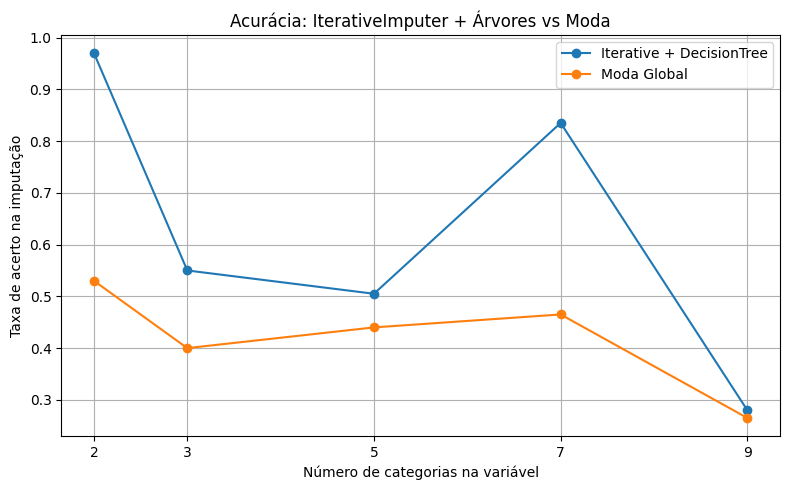

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from tqdm import tqdm

# Função para calcular V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Carregar dados
file_path = 'mushrooms_data/agaricus-lepiota.data'
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv(file_path, header=None, names=columns)
df.replace('?', np.nan, inplace=True)
df_full = df.dropna().sample(n=1000, random_state=42).reset_index(drop=True)

# Variáveis a testar
test_cols = ['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-color']

missing_rate = 0.2
np.random.seed(42)

num_categories = []
accuracy_iterative = []
accuracy_mode = []

for col in test_cols:
    print(f"\nProcessando coluna: {col}")

    df_missing = df_full.copy()
    n_missing = int(len(df_missing) * missing_rate)
    missing_indices = np.random.choice(df_missing.index, size=n_missing, replace=False)
    df_missing.loc[missing_indices, col] = np.nan

    # Calcular V de Cramer com outras variáveis
    v_scores = {}
    for other_col in df_full.columns:
        if other_col != col:
            v = cramers_v(df_full[col], df_full[other_col])
            v_scores[other_col] = v

    top_features = sorted(v_scores, key=v_scores.get, reverse=True)[:5]
    selected_columns = top_features + [col]

    # Subconjunto dos dados
    df_subset = df_missing[selected_columns]

    # Codificar
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df_encoded = encoder.fit_transform(df_subset)

    # Imputar com IterativeImputer + DecisionTreeClassifier
    imputer = IterativeImputer(
        estimator=DecisionTreeClassifier(random_state=42),
        max_iter=10,
        random_state=42
    )
    df_imputed_array = imputer.fit_transform(df_encoded)

    df_imputed = pd.DataFrame(df_imputed_array, columns=selected_columns).round().astype(int)
    df_imputed = pd.DataFrame(encoder.inverse_transform(df_imputed), columns=selected_columns)

    # Avaliar acurácia na coluna imputada
    true_values = df_full.loc[missing_indices, col].reset_index(drop=True)
    pred_values = df_imputed.loc[missing_indices, col].reset_index(drop=True)
    acc_iterative = (true_values == pred_values).mean()

    # Imputação por moda
    global_mode = df_full[col].mode().iloc[0]
    df_imputed_mode = df_missing.copy()
    df_imputed_mode.loc[missing_indices, col] = global_mode
    acc_mode = (true_values == df_imputed_mode.loc[missing_indices, col].reset_index(drop=True)).mean()

    # Salvar resultados
    num_categories.append(df_full[col].nunique())
    accuracy_iterative.append(acc_iterative)
    accuracy_mode.append(acc_mode)

    print(f"Acurácia IterativeImputer + DecisionTree: {acc_iterative:.2%}")
    print(f"Acurácia Moda Global:                     {acc_mode:.2%}")

# Plotar resultados
results = pd.DataFrame({
    'num_categories': num_categories,
    'accuracy_iterative': accuracy_iterative,
    'accuracy_mode': accuracy_mode
}).sort_values(by='num_categories')

plt.figure(figsize=(8, 5))
plt.plot(results['num_categories'], results['accuracy_iterative'], marker='o', label='Iterative + DecisionTree')
plt.plot(results['num_categories'], results['accuracy_mode'], marker='o', label='Moda Global')
plt.xticks(results['num_categories'])
plt.xlabel('Número de categorias na variável')
plt.ylabel('Taxa de acerto na imputação')
plt.title('Acurácia: IterativeImputer + Árvores vs Moda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🧠 Explicação detalhada da imputação com Árvores de Decisão + V de Cramer

## ✅ O que está acontecendo: passo a passo da imputação

### 1. Induzimos valores faltantes
Simulamos dados faltantes em uma coluna específica (ex: `odor`) com uma taxa de 20%, escolhendo aleatoriamente os índices.

---

### 2. Selecionamos as 5 variáveis mais associadas com a variável faltante usando o V de Cramer

O **V de Cramer** é uma métrica estatística de **associação entre variáveis categóricas**. Ele mede o quanto duas variáveis estão associadas (como correlação para variáveis categóricas).

- **Por que isso é importante?**  
  Nem todas as variáveis ajudam igualmente a prever uma variável faltante. Se uma variável não tem relação com a variável com dados ausentes, ela só atrapalha ou adiciona ruído ao modelo de imputação.

- Usar as **5 variáveis com maior V de Cramer** faz com que o modelo aprenda **padrões reais** entre categorias — por exemplo:

  > Se "gill-color" tende a ser branca quando "odor" é none, essa associação será aprendida.

---

### 3. Codificamos os dados com OrdinalEncoder

- As árvores precisam de dados numéricos para funcionar.
- O `OrdinalEncoder` converte categorias em números inteiros (ex: `'brown' → 3`, `'white' → 1`).
- Importante: usamos `handle_unknown='use_encoded_value'` para tratar valores ausentes como `-1`.

---

### 4. Imputamos com o IterativeImputer usando DecisionTreeClassifier

- O `IterativeImputer` trata a imputação como uma **tarefa de aprendizado supervisionado**:
  - Para cada variável com valores faltantes, ele **treina um modelo** (neste caso, árvore de decisão) para **prever os valores ausentes** usando as outras variáveis como input.
  - Ele faz isso de forma **iterativa**, refinando as previsões ao longo de várias rodadas.

- A árvore de decisão é **capaz de capturar relações não-lineares e interações entre categorias**.

---

### 5. Comparamos o valor imputado com o valor verdadeiro

- Como estamos simulando os `NaN`, sabemos qual era o valor real.
- Calculamos a **taxa de acerto da imputação** (accuracy) — o percentual de vezes que o valor imputado bate com o verdadeiro.

---

### 6. Comparamos com imputação por moda

- A imputação por moda simplesmente preenche todos os valores ausentes com o **valor mais frequente** da coluna.
- Essa abordagem ignora completamente o contexto (ex: outras variáveis).
- Funciona bem apenas quando a distribuição da variável é muito concentrada (ou seja, um valor domina claramente).

---

## 🚀 Por que o resultado foi melhor?

### ✔️ 1. Menos ruído no input
- Em vez de usar todas as variáveis (inclusive irrelevantes), usamos só as mais associadas.
- Isso evita que o modelo aprenda padrões espúrios.

### ✔️ 2. Aprendizado supervisionado contextual
- A árvore de decisão realmente **aprende padrões** entre variáveis categóricas.
- Exemplo:  
  > Se `bruises = t` e `gill-size = narrow`, então a chance de `odor = f` é alta.  
- Isso é impossível de capturar com moda global.

### ✔️ 3. Cada variável tem suas melhores preditoras
- A seleção com V de Cramer é **personalizada para cada variável**, melhorando muito o desempenho.

---

## 🧠 Analogia rápida

- Imputar com a moda é como dizer:  
  > "Não sei nada sobre você, então vou chutar o valor mais comum."

- Já com árvore de decisão + V de Cramer, é como dizer:  
  > "Baseado nas suas outras respostas (que sei que estão associadas à que falta), acredito que sua resposta é provavelmente essa."

---

## 🔄 Possíveis extensões

Se quiser, podemos:

- Substituir o V de Cramer por **Informação Mútua** e comparar.
- Ajustar o número de variáveis preditoras `k`.
- Medir a importância de cada variável usada na árvore.

---



Por que usar V de Cramer junto com KNN?
O que faz o KNN na imputação?
O KNN (K-Nearest Neighbors) para imputação busca os k vizinhos mais próximos de um dado com valor faltante, e usa os valores desses vizinhos para imputar.

A “distância” entre os exemplos é calculada em todo o espaço das variáveis (features).

O problema com dados categóricos puros
Em dados categóricos, a definição de distância pode ser problemática.

Muitas vezes, a distância padrão (como distância Euclidiana ou Manhattan) não é adequada para variáveis categóricas.

Se você simplesmente usa todas as variáveis para calcular distância, algumas variáveis pouco relacionadas podem adicionar ruído, atrapalhando a escolha dos vizinhos.

Como o V de Cramer ajuda?
O V de Cramer mede a associação entre variáveis categóricas.

Usando ele, você pode selecionar só as variáveis mais relacionadas com a variável que está imputando para calcular a distância.

Ou seja, a distância entre as observações será calculada com base nas variáveis mais relevantes, tornando os vizinhos mais “verdadeiramente parecidos” para aquele atributo.

Resultado esperado
Vizinho mais relevante → imputação mais precisa.

Menos ruído → menos chance do KNN escolher vizinhos que não ajudam na imputação.

Como implementar isso?
Para a variável que você quer imputar, calcule o V de Cramer com todas as outras variáveis.

Selecione as k variáveis com maior V de Cramer.

Calcule a distância entre as amostras usando apenas essas k variáveis.

Aplique o KNN para imputar usando essa distância “filtrada”.

